In [142]:
### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
import pandas as pd
import yfinance as yf
from pandas_datareader import data as pdr

In [3]:
yf.pdr_override()
df = pdr.get_data_yahoo("SI=F", start="2016-01-01", end="2023-04-06")
#df = pd.DataFrame(data = df, columns=['Open','High', 'Low','Close','Adj Close','Volume'])
if isinstance(df, pd.DataFrame):
    df.head()


[*********************100%***********************]  1 of 1 completed


In [4]:
df.to_csv("Price_Silver.csv")

In [8]:
df=pd.read_csv('Price_Silver.csv')

In [9]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/4/2016,14.100,14.100,13.817,13.817,13.817,27.0
1,1/5/2016,13.949,13.949,13.949,13.949,13.949,4.0
2,1/6/2016,14.000,14.065,13.957,13.957,13.957,105.0
3,1/7/2016,14.335,14.340,14.330,14.335,14.335,286.0
4,1/8/2016,14.060,14.060,13.908,13.908,13.908,6.0


In [10]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1820,3/31/2023,23.870001,24.165001,23.870001,24.076000,24.076000,34.0
1821,4/3/2023,23.725000,24.070000,23.695000,23.941000,23.941000,26.0
1822,4/4/2023,24.415001,25.084999,24.415001,25.021999,25.021999,24.0
1823,4/5/2023,25.115000,25.145000,24.790001,24.962999,24.962999,24.0
1824,4/6/2023,NaN,24.745000,NaN,NaN,NaN,NaN


In [11]:
df.shape

(1825, 7)

In [12]:
df1=df.reset_index()['High']

In [13]:
df1

0       14.100000
1       13.949000
2       14.065000
3       14.340000
4       14.060000
          ...    
1820    24.165001
1821    24.070000
1822    25.084999
1823    25.145000
1824    24.745000
Name: High, Length: 1825, dtype: float64

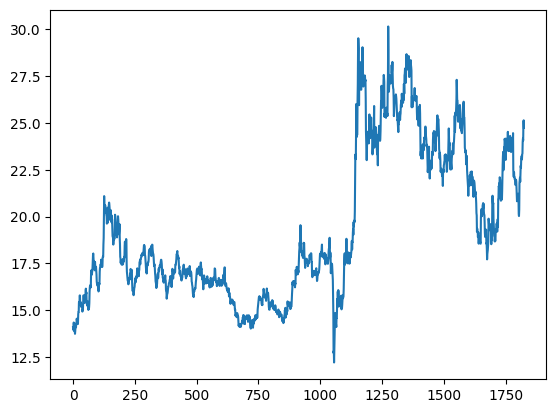

In [14]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [15]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [16]:
import numpy as np

In [17]:
df1

0       14.100000
1       13.949000
2       14.065000
3       14.340000
4       14.060000
          ...    
1820    24.165001
1821    24.070000
1822    25.084999
1823    25.145000
1824    24.745000
Name: High, Length: 1825, dtype: float64

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [19]:
df1

array([[0.10554166],
       [0.09713174],
       [0.1035923 ],
       ...,
       [0.71734888],
       [0.72069065],
       [0.69841271]])

In [20]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [21]:
training_size,test_size

(1186, 639)

In [22]:
train_data

array([[0.10554166],
       [0.09713174],
       [0.1035923 ],
       ...,
       [0.84126982],
       [0.78668895],
       [0.6886661 ]])

In [23]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [24]:
# reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [25]:
print(X_train.shape), print(y_train.shape)

(1085, 100)
(1085,)


(None, None)

In [26]:
print(X_test.shape), print(ytest.shape)

(538, 100)
(538,)


(None, None)

In [27]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [28]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [29]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
17/17 [==============================] - 13s 405ms/step - loss: 0.0212 - val_loss: 0.0311
Epoch 2/100
17/17 [==============================] - 4s 235ms/step - loss: 0.0051 - val_loss: 0.0100
Epoch 3/100
17/17 [==============================] - 4s 228ms/step - loss: 0.0030 - val_loss: 0.0057
Epoch 4/100
17/17 [==============================] - 4s 253ms/step - loss: 0.0026 - val_loss: 0.0064
Epoch 5/100
17/17 [==============================] - 4s 264ms/step - loss: 0.0023 - val_loss: 0.0033
Epoch 6/100
17/17 [==============================] - 3s 202ms/step - loss: 0.0022 - val_loss: 0.0031
Epoch 7/100
17/17 [==============================] - 4s 260ms/step - loss: 0.0020 - val_loss: 0.0031
Epoch 8/100
17/17 [==============================] - 4s 229ms/step - loss: 0.0019 - val_loss: 0.0033
Epoch 9/100
17/17 [==============================] - 4s 218ms/step - loss: 0.0018 - val_loss: 0.0028
Epoch 10/100
17/17 [==============================] - 5s 300ms/step - loss: 0.0017 - val_l

In [33]:
import tensorflow as tf

In [34]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

17/17 [==============================] - 3s 163ms/step


In [35]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [36]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

17.065477351528987

In [37]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

22.776489460481166

In [38]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

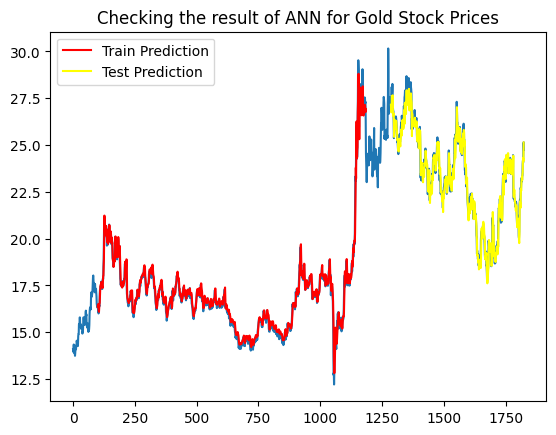

In [39]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot, color = "red", label = "Train Prediction")
plt.plot(testPredictPlot, color = "yellow", label = "Test Prediction")
plt.legend()
plt.title("Checking the result of ANN for Gold Stock Prices")
plt.show()

In [40]:
len(test_data)

639

In [41]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 298)

In [42]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [43]:
temp_input

[0.5742132837758246,
 0.6012252922353535,
 0.591200212274242,
 0.5769980869055898,
 0.5750487780703658,
 0.6056808712000924,
 0.6140350689491761,
 0.6199387671064168,
 0.6301308395493822,
 0.6216095429413905,
 0.6521860788445016,
 0.6200500954276528,
 0.6346978532124116,
 0.6499025717345132,
 0.6569200849893849,
 0.6742412112056188,
 0.6878307122332582,
 0.7343358129436651,
 0.6861598300212303,
 0.7045391071744772,
 0.7440824651676844,
 0.7354497344183503,
 0.7426901170698027,
 0.7591199784538233,
 0.7841826780781279,
 0.8412698194869891,
 0.818434962812055,
 0.7795599996975328,
 0.7794486713762968,
 0.765524973187789,
 0.7194652921393802,
 0.7165134959708129,
 0.7482595111321729,
 0.7354497344183503,
 0.733221997846034,
 0.7234753450650667,
 0.7276524974066095,
 0.763018703615222,
 0.7663603611052757,
 0.7243107329825537,
 0.6967975343233545,
 0.7251462272770949,
 0.7193539638181442,
 0.7053746014690182,
 0.6894458233506661,
 0.6922862911979971,
 0.68253963841703,
 0.6977443569391316,

In [45]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=297
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.60122529 0.59120021 0.57699809 0.57504878 0.60568087 0.61403507
 0.61993877 0.63013084 0.62160954 0.65218608 0.6200501  0.63469785
 0.64990257 0.65692008 0.67424121 0.68783071 0.73433581 0.68615983
 0.70453911 0.74408247 0.73544973 0.74269012 0.75911998 0.78418268
 0.84126982 0.81843496 0.77956    0.77944867 0.76552497 0.71946529
 0.7165135  0.74825951 0.73544973 0.733222   0.72347535 0.7276525
 0.7630187  0.76636036 0.72431073 0.69679753 0.72514623 0.71935396
 0.7053746  0.68944582 0.69228629 0.68253964 0.69774436 0.70843773
 0.74129766 0.75577832 0.76970202 0.75104431 0.77610691 0.77025898
 0.7276525  0.72820946 0.69729883 0.63842937 0.63436366 0.62673352
 0.62406015 0.631022   0.59175717 0.5892509  0.60233921 0.61487056
 0.57254251 0.55611254 0.5455305  0.53467003 0.52186025 0.4962406
 0.52353103 0.53088274 0.52742965 0.53984967 0.52709556 0.55694793
 0.54915069 0.54385962 0.54224451 0.56752997 0.52742965 0.53906995
 0.56363135 0.56836536 0.54965188 0.55438599 0.55054

3 day output [[0.7029888]]
4 day input [0.60568087 0.61403507 0.61993877 0.63013084 0.62160954 0.65218608
 0.6200501  0.63469785 0.64990257 0.65692008 0.67424121 0.68783071
 0.73433581 0.68615983 0.70453911 0.74408247 0.73544973 0.74269012
 0.75911998 0.78418268 0.84126982 0.81843496 0.77956    0.77944867
 0.76552497 0.71946529 0.7165135  0.74825951 0.73544973 0.733222
 0.72347535 0.7276525  0.7630187  0.76636036 0.72431073 0.69679753
 0.72514623 0.71935396 0.7053746  0.68944582 0.69228629 0.68253964
 0.69774436 0.70843773 0.74129766 0.75577832 0.76970202 0.75104431
 0.77610691 0.77025898 0.7276525  0.72820946 0.69729883 0.63842937
 0.63436366 0.62673352 0.62406015 0.631022   0.59175717 0.5892509
 0.60233921 0.61487056 0.57254251 0.55611254 0.5455305  0.53467003
 0.52186025 0.4962406  0.52353103 0.53088274 0.52742965 0.53984967
 0.52709556 0.55694793 0.54915069 0.54385962 0.54224451 0.56752997
 0.52742965 0.53906995 0.56363135 0.56836536 0.54965188 0.55438599
 0.55054304 0.54915069 0.5

6 day output [[0.71982765]]
7 day input [0.63013084 0.62160954 0.65218608 0.6200501  0.63469785 0.64990257
 0.65692008 0.67424121 0.68783071 0.73433581 0.68615983 0.70453911
 0.74408247 0.73544973 0.74269012 0.75911998 0.78418268 0.84126982
 0.81843496 0.77956    0.77944867 0.76552497 0.71946529 0.7165135
 0.74825951 0.73544973 0.733222   0.72347535 0.7276525  0.7630187
 0.76636036 0.72431073 0.69679753 0.72514623 0.71935396 0.7053746
 0.68944582 0.69228629 0.68253964 0.69774436 0.70843773 0.74129766
 0.75577832 0.76970202 0.75104431 0.77610691 0.77025898 0.7276525
 0.72820946 0.69729883 0.63842937 0.63436366 0.62673352 0.62406015
 0.631022   0.59175717 0.5892509  0.60233921 0.61487056 0.57254251
 0.55611254 0.5455305  0.53467003 0.52186025 0.4962406  0.52353103
 0.53088274 0.52742965 0.53984967 0.52709556 0.55694793 0.54915069
 0.54385962 0.54224451 0.56752997 0.52742965 0.53906995 0.56363135
 0.56836536 0.54965188 0.55438599 0.55054304 0.54915069 0.54107492
 0.5260373  0.49289894 0.5

9 day output [[0.7179313]]
10 day input [0.6200501  0.63469785 0.64990257 0.65692008 0.67424121 0.68783071
 0.73433581 0.68615983 0.70453911 0.74408247 0.73544973 0.74269012
 0.75911998 0.78418268 0.84126982 0.81843496 0.77956    0.77944867
 0.76552497 0.71946529 0.7165135  0.74825951 0.73544973 0.733222
 0.72347535 0.7276525  0.7630187  0.76636036 0.72431073 0.69679753
 0.72514623 0.71935396 0.7053746  0.68944582 0.69228629 0.68253964
 0.69774436 0.70843773 0.74129766 0.75577832 0.76970202 0.75104431
 0.77610691 0.77025898 0.7276525  0.72820946 0.69729883 0.63842937
 0.63436366 0.62673352 0.62406015 0.631022   0.59175717 0.5892509
 0.60233921 0.61487056 0.57254251 0.55611254 0.5455305  0.53467003
 0.52186025 0.4962406  0.52353103 0.53088274 0.52742965 0.53984967
 0.52709556 0.55694793 0.54915069 0.54385962 0.54224451 0.56752997
 0.52742965 0.53906995 0.56363135 0.56836536 0.54965188 0.55438599
 0.55054304 0.54915069 0.54107492 0.5260373  0.49289894 0.51573379
 0.54135335 0.53884708 0.

12 day output [[0.7163676]]
13 day input [0.65692008 0.67424121 0.68783071 0.73433581 0.68615983 0.70453911
 0.74408247 0.73544973 0.74269012 0.75911998 0.78418268 0.84126982
 0.81843496 0.77956    0.77944867 0.76552497 0.71946529 0.7165135
 0.74825951 0.73544973 0.733222   0.72347535 0.7276525  0.7630187
 0.76636036 0.72431073 0.69679753 0.72514623 0.71935396 0.7053746
 0.68944582 0.69228629 0.68253964 0.69774436 0.70843773 0.74129766
 0.75577832 0.76970202 0.75104431 0.77610691 0.77025898 0.7276525
 0.72820946 0.69729883 0.63842937 0.63436366 0.62673352 0.62406015
 0.631022   0.59175717 0.5892509  0.60233921 0.61487056 0.57254251
 0.55611254 0.5455305  0.53467003 0.52186025 0.4962406  0.52353103
 0.53088274 0.52742965 0.53984967 0.52709556 0.55694793 0.54915069
 0.54385962 0.54224451 0.56752997 0.52742965 0.53906995 0.56363135
 0.56836536 0.54965188 0.55438599 0.55054304 0.54915069 0.54107492
 0.5260373  0.49289894 0.51573379 0.54135335 0.53884708 0.5343915
 0.52297407 0.51099968 0.4

15 day output [[0.71525633]]
16 day input [0.73433581 0.68615983 0.70453911 0.74408247 0.73544973 0.74269012
 0.75911998 0.78418268 0.84126982 0.81843496 0.77956    0.77944867
 0.76552497 0.71946529 0.7165135  0.74825951 0.73544973 0.733222
 0.72347535 0.7276525  0.7630187  0.76636036 0.72431073 0.69679753
 0.72514623 0.71935396 0.7053746  0.68944582 0.69228629 0.68253964
 0.69774436 0.70843773 0.74129766 0.75577832 0.76970202 0.75104431
 0.77610691 0.77025898 0.7276525  0.72820946 0.69729883 0.63842937
 0.63436366 0.62673352 0.62406015 0.631022   0.59175717 0.5892509
 0.60233921 0.61487056 0.57254251 0.55611254 0.5455305  0.53467003
 0.52186025 0.4962406  0.52353103 0.53088274 0.52742965 0.53984967
 0.52709556 0.55694793 0.54915069 0.54385962 0.54224451 0.56752997
 0.52742965 0.53906995 0.56363135 0.56836536 0.54965188 0.55438599
 0.55054304 0.54915069 0.54107492 0.5260373  0.49289894 0.51573379
 0.54135335 0.53884708 0.5343915  0.52297407 0.51099968 0.49958225
 0.50821498 0.50013921 

18 day output [[0.71117306]]
19 day input [0.74408247 0.73544973 0.74269012 0.75911998 0.78418268 0.84126982
 0.81843496 0.77956    0.77944867 0.76552497 0.71946529 0.7165135
 0.74825951 0.73544973 0.733222   0.72347535 0.7276525  0.7630187
 0.76636036 0.72431073 0.69679753 0.72514623 0.71935396 0.7053746
 0.68944582 0.69228629 0.68253964 0.69774436 0.70843773 0.74129766
 0.75577832 0.76970202 0.75104431 0.77610691 0.77025898 0.7276525
 0.72820946 0.69729883 0.63842937 0.63436366 0.62673352 0.62406015
 0.631022   0.59175717 0.5892509  0.60233921 0.61487056 0.57254251
 0.55611254 0.5455305  0.53467003 0.52186025 0.4962406  0.52353103
 0.53088274 0.52742965 0.53984967 0.52709556 0.55694793 0.54915069
 0.54385962 0.54224451 0.56752997 0.52742965 0.53906995 0.56363135
 0.56836536 0.54965188 0.55438599 0.55054304 0.54915069 0.54107492
 0.5260373  0.49289894 0.51573379 0.54135335 0.53884708 0.5343915
 0.52297407 0.51099968 0.49958225 0.50821498 0.50013921 0.48955728
 0.47340574 0.44444442 0.

21 day output [[0.7064668]]
22 day input [0.75911998 0.78418268 0.84126982 0.81843496 0.77956    0.77944867
 0.76552497 0.71946529 0.7165135  0.74825951 0.73544973 0.733222
 0.72347535 0.7276525  0.7630187  0.76636036 0.72431073 0.69679753
 0.72514623 0.71935396 0.7053746  0.68944582 0.69228629 0.68253964
 0.69774436 0.70843773 0.74129766 0.75577832 0.76970202 0.75104431
 0.77610691 0.77025898 0.7276525  0.72820946 0.69729883 0.63842937
 0.63436366 0.62673352 0.62406015 0.631022   0.59175717 0.5892509
 0.60233921 0.61487056 0.57254251 0.55611254 0.5455305  0.53467003
 0.52186025 0.4962406  0.52353103 0.53088274 0.52742965 0.53984967
 0.52709556 0.55694793 0.54915069 0.54385962 0.54224451 0.56752997
 0.52742965 0.53906995 0.56363135 0.56836536 0.54965188 0.55438599
 0.55054304 0.54915069 0.54107492 0.5260373  0.49289894 0.51573379
 0.54135335 0.53884708 0.5343915  0.52297407 0.51099968 0.49958225
 0.50821498 0.50013921 0.48955728 0.47340574 0.44444442 0.43803953
 0.38930659 0.39849628 0

24 day output [[0.7015974]]
25 day input [0.81843496 0.77956    0.77944867 0.76552497 0.71946529 0.7165135
 0.74825951 0.73544973 0.733222   0.72347535 0.7276525  0.7630187
 0.76636036 0.72431073 0.69679753 0.72514623 0.71935396 0.7053746
 0.68944582 0.69228629 0.68253964 0.69774436 0.70843773 0.74129766
 0.75577832 0.76970202 0.75104431 0.77610691 0.77025898 0.7276525
 0.72820946 0.69729883 0.63842937 0.63436366 0.62673352 0.62406015
 0.631022   0.59175717 0.5892509  0.60233921 0.61487056 0.57254251
 0.55611254 0.5455305  0.53467003 0.52186025 0.4962406  0.52353103
 0.53088274 0.52742965 0.53984967 0.52709556 0.55694793 0.54915069
 0.54385962 0.54224451 0.56752997 0.52742965 0.53906995 0.56363135
 0.56836536 0.54965188 0.55438599 0.55054304 0.54915069 0.54107492
 0.5260373  0.49289894 0.51573379 0.54135335 0.53884708 0.5343915
 0.52297407 0.51099968 0.49958225 0.50821498 0.50013921 0.48955728
 0.47340574 0.44444442 0.43803953 0.38930659 0.39849628 0.39069894
 0.38763581 0.37282096 0.3

27 day output [[0.69626343]]
28 day input [0.76552497 0.71946529 0.7165135  0.74825951 0.73544973 0.733222
 0.72347535 0.7276525  0.7630187  0.76636036 0.72431073 0.69679753
 0.72514623 0.71935396 0.7053746  0.68944582 0.69228629 0.68253964
 0.69774436 0.70843773 0.74129766 0.75577832 0.76970202 0.75104431
 0.77610691 0.77025898 0.7276525  0.72820946 0.69729883 0.63842937
 0.63436366 0.62673352 0.62406015 0.631022   0.59175717 0.5892509
 0.60233921 0.61487056 0.57254251 0.55611254 0.5455305  0.53467003
 0.52186025 0.4962406  0.52353103 0.53088274 0.52742965 0.53984967
 0.52709556 0.55694793 0.54915069 0.54385962 0.54224451 0.56752997
 0.52742965 0.53906995 0.56363135 0.56836536 0.54965188 0.55438599
 0.55054304 0.54915069 0.54107492 0.5260373  0.49289894 0.51573379
 0.54135335 0.53884708 0.5343915  0.52297407 0.51099968 0.49958225
 0.50821498 0.50013921 0.48955728 0.47340574 0.44444442 0.43803953
 0.38930659 0.39849628 0.39069894 0.38763581 0.37282096 0.38819267
 0.38401562 0.35366196 

In [46]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [47]:
import matplotlib.pyplot as plt

In [48]:
len(df1)

1825

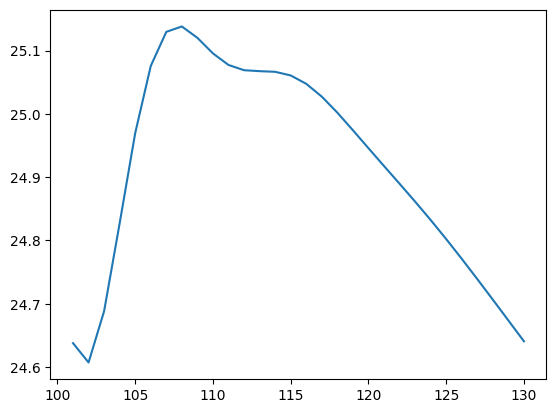

In [49]:
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [50]:
df1

array([[0.10554166],
       [0.09713174],
       [0.1035923 ],
       ...,
       [0.71734888],
       [0.72069065],
       [0.69841271]])

In [51]:
scaler.inverse_transform(lst_output)

array([[24.63771786],
       [24.60717859],
       [24.68833838],
       [24.82716384],
       [24.96963119],
       [25.07561965],
       [25.12950536],
       [25.13799099],
       [25.12003087],
       [25.09545583],
       [25.07718107],
       [25.06891698],
       [25.06738017],
       [25.06639665],
       [25.06060794],
       [25.04742734],
       [25.02715451],
       [25.00188063],
       [24.97411212],
       [24.94572289],
       [24.91756696],
       [24.88961116],
       [24.86136426],
       [24.83231471],
       [24.80218105],
       [24.77098468],
       [24.73896212],
       [24.7064098 ],
       [24.6735878 ],
       [24.64065984]])

In [52]:
df1 = scaler.inverse_transform(df1[1158:])
lst_output = scaler.inverse_transform(lst_output)

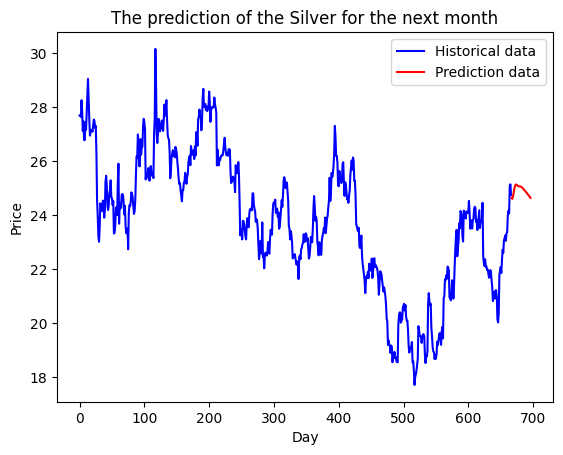

In [53]:
# plot df1
plt.plot(df1, color='blue', label='Historical data')

# plot lst_output starting at the end of df1
plt.plot(range(len(df1), len(df1) + len(lst_output)), lst_output, color='red', label='Prediction data')

# add legend and labels
plt.legend()
plt.xlabel('Day')
plt.ylabel('Price')
plt.title("The prediction of the Silver for the next month")

# show the plot
plt.show()